# System analysis

### 1) Load data from BIN files

In [1]:
### Load data from disk
import pickle
with open('aida_agdistis.bin', 'rb') as outfile:
    aida_agd_articles=pickle.load(outfile)
with open('wes2015_agdistis.bin', 'rb') as outfile:
    wes_agd_articles=pickle.load(outfile)
with open('aida_spotlight.bin', 'rb') as outfile:
    aida_spot_articles=pickle.load(outfile)
with open('wes2015_spotlight.bin', 'rb') as outfile:
    wes_spot_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

In [2]:
import utils
import plot_utils
import time
from collections import defaultdict

**1.1. Pick dataset**

In [3]:
articles=aida_agd_articles
skip_nils=True

### 2) Overall performance

<span style="background-color:lightgreen">Section 6.1. of the paper</span>

In [4]:
plot_utils.overall_performance(aida_agd_articles, skip_nils)

13082 27817


0.4702879534097854

### 3) Correlation between form frequency and accuracy

<span style="background-color:lightgreen">Section 6.2. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**3.1. Correct and total amount per form**

In [27]:
correct_by_form = defaultdict(int)
total_by_form = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_form[entity.mention]+=1
            total_by_form[entity.mention]+=1

**3.2. Aggregate per frequency**

In [28]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
forms_by_count=defaultdict(set)
for form, count in total_by_form.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_form[form]
    agg_per_frequency[count]['t']+=count
    forms_by_count[count].add(form)
print(agg_per_frequency)

OrderedDict([(4, {'c': 787, 't': 1600}), (5, {'c': 591, 't': 1160}), (109, {'c': 109, 't': 109}), (56, {'c': 38, 't': 112}), (15, {'c': 135, 't': 375}), (28, {'c': 21, 't': 168}), (114, {'c': 96, 't': 114}), (16, {'c': 119, 't': 352}), (2, {'c': 1257, 't': 2344}), (9, {'c': 256, 't': 720}), (14, {'c': 106, 't': 350}), (10, {'c': 239, 't': 600}), (1, {'c': 1850, 't': 3491}), (13, {'c': 156, 't': 455}), (8, {'c': 281, 't': 768}), (12, {'c': 210, 't': 444}), (3, {'c': 929, 't': 1776}), (26, {'c': 124, 't': 260}), (167, {'c': 143, 't': 167}), (116, {'c': 78, 't': 116}), (48, {'c': 54, 't': 144}), (22, {'c': 50, 't': 198}), (39, {'c': 0, 't': 78}), (86, {'c': 31, 't': 172}), (18, {'c': 148, 't': 360}), (11, {'c': 192, 't': 550}), (7, {'c': 419, 't': 945}), (17, {'c': 117, 't': 289}), (143, {'c': 12, 't': 143}), (6, {'c': 517, 't': 1056}), (95, {'c': 85, 't': 95}), (98, {'c': 4, 't': 98}), (61, {'c': 34, 't': 61}), (83, {'c': 79, 't': 83}), (68, {'c': 63, 't': 136}), (38, {'c': 43, 't': 152}

In [30]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, forms_by_count[key])
    accs[key]=acc

460 0.0 {'U.S.'}
236 94.91525423728814 {'Germany'}
203 70.93596059113301 {'Australia'}
198 72.72727272727273 {'France'}
176 45.45454545454545 {'England'}
167 85.62874251497006 {'Russia'}
164 0.0 {'Britain'}
160 97.5 {'Italy'}
149 0.0 {'China'}
147 100.0 {'LONDON'}
144 96.52777777777777 {'Spain'}
143 8.391608391608392 {'NEW YORK'}
132 65.15151515151516 {'Japan'}
116 67.24137931034483 {'Russian'}
114 84.21052631578948 {'German'}
109 100.0 {'Reuters'}
108 73.14814814814815 {'Israel', 'Sweden'}
103 30.097087378640776 {'Pakistan'}
98 4.081632653061225 {'Iraq'}
95 89.47368421052632 {'Belgium'}
94 80.85106382978724 {'London'}
93 46.774193548387096 {'Clinton', 'British'}
86 18.023255813953487 {'India', 'French'}
85 0.0 {'CHICAGO'}
83 95.18072289156626 {'United States'}
80 56.25 {'Netherlands', 'Israeli'}
74 83.78378378378379 {'Canada', 'Austria'}
72 83.33333333333333 {'South Africa'}
71 0.0 {'Dutch'}
70 2.857142857142857 {'European'}
69 0.0 {'World Cup'}
68 46.3235294117647 {'Iraqi', 'Czech Re

**3.3. Plot frequency distribution**

In [ ]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 4) Correlation between instance frequency and accuracy

<span style="background-color:lightgreen">Section 6.3. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**4.1. Correct and total amount per URI**

In [32]:
correct_by_uri = defaultdict(int)
total_by_uri = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_uri[entity.gold_link]+=1
            total_by_uri[entity.gold_link]+=1

**4.2. Aggregate per frequency**

In [33]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
uris_by_count=defaultdict(set)
for uri, count in total_by_uri.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_uri[uri]
    agg_per_frequency[count]['t']+=count
    uris_by_count[count].add(uri)
print(agg_per_frequency)

OrderedDict([(9, {'c': 243, 't': 711}), (110, {'c': 110, 't': 110}), (636, {'c': 121, 't': 636}), (354, {'c': 321, 't': 354}), (42, {'c': 14, 't': 42}), (16, {'c': 134, 't': 320}), (2, {'c': 1057, 't': 2082}), (4, {'c': 530, 't': 1412}), (14, {'c': 198, 't': 420}), (8, {'c': 367, 't': 904}), (10, {'c': 276, 't': 720}), (15, {'c': 119, 't': 360}), (1, {'c': 1295, 't': 2468}), (27, {'c': 76, 't': 216}), (43, {'c': 121, 't': 172}), (5, {'c': 628, 't': 1165}), (3, {'c': 723, 't': 1554}), (308, {'c': 226, 't': 308}), (64, {'c': 128, 't': 128}), (94, {'c': 63, 't': 94}), (299, {'c': 146, 't': 299}), (60, {'c': 45, 't': 240}), (19, {'c': 206, 't': 418}), (11, {'c': 270, 't': 594}), (7, {'c': 386, 't': 896}), (17, {'c': 114, 't': 323}), (44, {'c': 102, 't': 176}), (144, {'c': 7, 't': 144}), (18, {'c': 203, 't': 306}), (129, {'c': 125, 't': 129}), (185, {'c': 6, 't': 185}), (88, {'c': 34, 't': 88}), (36, {'c': 167, 't': 324}), (13, {'c': 117, 't': 299}), (28, {'c': 34, 't': 112}), (102, {'c': 5

In [34]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, uris_by_count[key])
    accs[key]=acc

636 19.0251572327044 {'United_States'}
354 90.67796610169492 {'Germany'}
308 73.37662337662337 {'Russia'}
299 48.82943143812709 {'France'}
280 2.142857142857143 {'United_Kingdom'}
234 95.2991452991453 {'London'}
215 73.02325581395348 {'Italy'}
204 92.15686274509804 {'Australia'}
194 48.96907216494845 {'Israel'}
185 3.2432432432432434 {'Iraq'}
183 0.0 {'People\\u0027s_Republic_of_China'}
178 79.21348314606742 {'Spain'}
160 31.25 {'Netherlands'}
159 54.088050314465406 {'England'}
153 56.86274509803921 {'Japan'}
144 4.861111111111111 {'New_York_City'}
129 96.89922480620154 {'Belgium'}
121 93.38842975206612 {'Sweden'}
116 94.82758620689656 {'Bill_Clinton'}
110 100.0 {'Reuters'}
109 31.65137614678899 {'Europe', 'Canada'}
102 51.96078431372549 {'Poland'}
100 31.0 {'India'}
94 67.02127659574468 {'Chechnya'}
93 30.107526881720432 {'Brazil'}
88 38.63636363636363 {'United_Nations'}
87 81.60919540229885 {'Czech_Republic'}
86 68.6046511627907 {'Austria'}
84 88.0952380952381 {'Switzerland'}
83 19.2

In [35]:
print(agg_per_frequency)

OrderedDict([(9, {'c': 243, 't': 711}), (110, {'c': 110, 't': 110}), (636, {'c': 121, 't': 636}), (354, {'c': 321, 't': 354}), (42, {'c': 14, 't': 42}), (16, {'c': 134, 't': 320}), (2, {'c': 1057, 't': 2082}), (4, {'c': 530, 't': 1412}), (14, {'c': 198, 't': 420}), (8, {'c': 367, 't': 904}), (10, {'c': 276, 't': 720}), (15, {'c': 119, 't': 360}), (1, {'c': 1295, 't': 2468}), (27, {'c': 76, 't': 216}), (43, {'c': 121, 't': 172}), (5, {'c': 628, 't': 1165}), (3, {'c': 723, 't': 1554}), (308, {'c': 226, 't': 308}), (64, {'c': 128, 't': 128}), (94, {'c': 63, 't': 94}), (299, {'c': 146, 't': 299}), (60, {'c': 45, 't': 240}), (19, {'c': 206, 't': 418}), (11, {'c': 270, 't': 594}), (7, {'c': 386, 't': 896}), (17, {'c': 114, 't': 323}), (44, {'c': 102, 't': 176}), (144, {'c': 7, 't': 144}), (18, {'c': 203, 't': 306}), (129, {'c': 125, 't': 129}), (185, {'c': 6, 't': 185}), (88, {'c': 34, 't': 88}), (36, {'c': 167, 't': 324}), (13, {'c': 117, 't': 299}), (28, {'c': 34, 't': 112}), (102, {'c': 5

In [36]:
list(accs.values())

[19.0251572327044,
 90.67796610169492,
 73.37662337662337,
 48.82943143812709,
 2.142857142857143,
 95.2991452991453,
 73.02325581395348,
 92.15686274509804,
 48.96907216494845,
 3.2432432432432434,
 0.0,
 79.21348314606742,
 31.25,
 54.088050314465406,
 56.86274509803921,
 4.861111111111111,
 96.89922480620154,
 93.38842975206612,
 94.82758620689656,
 100.0,
 31.65137614678899,
 51.96078431372549,
 31.0,
 67.02127659574468,
 30.107526881720432,
 38.63636363636363,
 81.60919540229885,
 68.6046511627907,
 88.0952380952381,
 19.27710843373494,
 0.0,
 50.0,
 88.31168831168831,
 61.8421052631579,
 10.95890410958904,
 0.0,
 57.971014492753625,
 97.05882352941177,
 37.121212121212125,
 20.0,
 100.0,
 71.42857142857143,
 18.75,
 62.71186440677966,
 0.0,
 0.0,
 61.904761904761905,
 92.72727272727273,
 83.33333333333333,
 67.3076923076923,
 25.49019607843137,
 0.0,
 93.87755102040816,
 25.0,
 0.0,
 47.82608695652174,
 40.0,
 57.95454545454545,
 70.34883720930233,
 33.333333333333336,
 17.073170

**4.3. Plot accuracies**

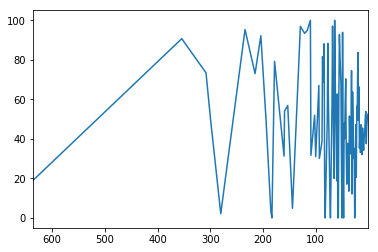

In [37]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 5) Correlation between instance ranks (of a form) and accuracy

<span style="background-color:lightgreen">Section 6.4. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>


**5.1. Collect interpretations for a form**


In [6]:
interpretations=defaultdict(set)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if not skip_nils or meaning!='--NME--':
            interpretations[form].add(meaning)

In [7]:
interpretations['Marseille']

{'Marseille', 'Olympique_de_Marseille'}

**5.2. Compute ambiguity of a form**


In [ ]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

**5.3. Aggregation per ambiguity**



In [ ]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [ ]:
agg_per_ambiguity

In [ ]:
plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [ ]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

**5.4. Aggregate per rank**



In [ ]:
correct_per_form=defaultdict(dict)
total_per_form=defaultdict(dict)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if skip_nils and meaning=='--NME--':
            continue
        if ambiguity[form]==1:
            continue
        if meaning not in total_per_form[form]:
            total_per_form[form][meaning]=0
            correct_per_form[form][meaning]=0
        total_per_form[form][meaning]+=1
        if meaning==mention.sys_link:
            correct_per_form[form][meaning]+=1

In [ ]:
len(total_per_form)

In [ ]:
from operator import itemgetter

correct_per_rank=defaultdict(int)
total_per_rank=defaultdict(int)
for form, data in total_per_form.items():
    sorted_by_rank=sorted(data.items(), key=lambda x:x[1], reverse=True)
    rank=1
    for ranked_URI, freq in sorted_by_rank:
        correct_per_rank[rank]+=correct_per_form[form][ranked_URI]
        total_per_rank[rank]+=freq
        rank+=1

In [ ]:
print(correct_per_rank)
print(total_per_rank)

In [ ]:
acc_per_rank=defaultdict(float)
for rank, total in total_per_rank.items():
    acc_per_rank[rank]=correct_per_rank[rank]/total

In [ ]:
acc_per_rank

In [8]:
plt.plot(list(acc_per_rank.keys()), list(acc_per_rank.values()), 'b-o')
plt.title("Accuracy per rank")
plt.xlabel("Rank")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'plt' is not defined

### 6) Ranks of the top-N most frequent forms

<span style="background-color:lightgreen">Section 6.5. of the paper</span>

<span style="background-color:red">TODO: IMPLEMENT</span>

### 7) PageRank analysis

<span style="background-color:lightgreen">Section 6.6. of the paper</span>

<span style="background-color:red">TODO: IMPLEMENT</span>

### 8) Notes

* connectivity should reflect popularity -> try pageRank
* this is the hardest part of the EL task
* sometimes nils are most frequent
* NILs - maybe set them aside
* very basic baseline - throw away dbpedia, randomly assign from the training data - build this baseline
* always try the most frequent one
* popular, transparent, and the best one - distinguish between open source systems
* look at coreference too (noun phrases and pronouns)
* annotation or not of coreferential expressions (we can also just use them in a solution)? 

#### Summary of the todos:
* Another system or 2 (spotlight) - PIEK: take popular, transparent, and the best one
* More datasets
* NIL entities
* Baseline
* Coreference